In [72]:
import pandas as pd

def select_state_data(csv_file, state_name):
    """
    Reads a CSV file, filters rows for Massachusetts, 
    and returns a DataFrame containing only Massachusetts data.
    """
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_file)

        # Filter rows based on the "state" column
        state_df = df[df["state"] == state_name]
        
        return state_df

    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return None  # Return None in case of an error
    except KeyError:
        print(f"Error: Column 'state' not found in '{csv_file}'.")
        return None

# Usage:
csv_file_path = "C:/Users/jonas/OneDrive/Dokumente/EPFL École polytéchnique de Lausanne/Cours/MA4/MIT Master Thesis/Work/Power_Outages/eaglei_outages_2023_raw.csv"  # Replace with your CSV file path
massachusetts_df = select_state_data(csv_file_path, "Massachusetts")

if massachusetts_df is not None:  # Check if filtering was successful
    # Get unique county names from the filtered DataFrame
    unique_counties_in_massachusetts = massachusetts_df["county"].unique()

    # Print the unique county names
    print("Unique Counties in Massachusetts:")
    for county in unique_counties_in_massachusetts:
        print(county)

Unique Counties in Massachusetts:
Barnstable
Berkshire
Bristol
Essex
Hampden
Hampshire
Middlesex
Norfolk
Plymouth
Worcester
Franklin
Dukes
Suffolk
Nantucket


In [73]:
massachusetts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211465 entries, 200 to 26100773
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fips_code       211465 non-null  int64 
 1   county          211465 non-null  object
 2   state           211465 non-null  object
 3   sum             211465 non-null  int64 
 4   run_start_time  211465 non-null  object
dtypes: int64(2), object(3)
memory usage: 9.7+ MB


In [74]:
# Filter for Suffolk County
suffolk_df = massachusetts_df[massachusetts_df["county"] == "Suffolk"]
suffolk_df.info()
suffolk_df.head()

# Save to CSV
#suffolk_df.to_csv("suffolk_outages.csv", index=False) 

#print("Data for Suffolk County has been saved to 'suffolk_outages.csv'")

<class 'pandas.core.frame.DataFrame'>
Index: 18296 entries, 42812 to 26082377
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fips_code       18296 non-null  int64 
 1   county          18296 non-null  object
 2   state           18296 non-null  object
 3   sum             18296 non-null  int64 
 4   run_start_time  18296 non-null  object
dtypes: int64(2), object(3)
memory usage: 857.6+ KB


,fips_code,county,state,sum,run_start_time
42812,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00
45687,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00
48440,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00
49107,25025,Suffolk,Massachusetts,1,2023-01-01 19:45:00
49773,25025,Suffolk,Massachusetts,1,2023-01-01 20:00:00


In [75]:
#Enrich with information about weekend/ weekday
suffolk_df['run_start_time'] = pd.to_datetime(suffolk_df['run_start_time'])

suffolk_df['Weekend'] = suffolk_df['run_start_time'].dt.weekday.isin([5, 6]).astype(int)

C:\Users\jonas\AppData\Local\Temp\ipykernel_18760\1942314166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffolk_df['run_start_time'] = pd.to_datetime(suffolk_df['run_start_time'])
C:\Users\jonas\AppData\Local\Temp\ipykernel_18760\1942314166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffolk_df['Weekend'] = suffolk_df['run_start_time'].dt.weekday.isin([5, 6]).astype(int)


In [102]:
def get_season(date):
    month = date.month
    day = date.day

    if (month == 3 and day >= 1) or (month >= 4 and month <= 5) or (month == 6 and day == 1):
        return 2  # Spring
    elif month >= 6 and month <= 8:
        return 1  # Summer
    elif month >= 9 and month <= 11:
        return 2  # Fall
    else:
        return 3  # Winter

# Apply the function to create the 'Season' column
suffolk_df['Season'] = suffolk_df['run_start_time'].apply(get_season)

# Display the updated DataFrame (optional)
suffolk_df.head(19100)

,fips_code,county,state,sum,run_start_time,Weekend,Season,hour,month,time_diff,outage_id
42812,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00,1,3,17,1,15.0,0
45687,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00,1,3,18,1,60.0,1
48440,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00,1,3,19,1,60.0,2
49107,25025,Suffolk,Massachusetts,1,2023-01-01 19:45:00,1,3,19,1,15.0,2
49773,25025,Suffolk,Massachusetts,1,2023-01-01 20:00:00,1,3,20,1,15.0,2
...,...,...,...,...,...,...,...,...,...,...,...
26080121,25025,Suffolk,Massachusetts,1,2023-12-31 14:00:00,1,3,14,12,15.0,1282
26080637,25025,Suffolk,Massachusetts,1,2023-12-31 14:15:00,1,3,14,12,15.0,1282
26081194,25025,Suffolk,Massachusetts,1,2023-12-31 14:30:00,1,3,14,12,15.0,1282
26081774,25025,Suffolk,Massachusetts,1,2023-12-31 14:45:00,1,3,14,12,15.0,1282


Remark: 
Here we define Summer = 1, Spring/Fall = 2, Winter = 3 as the "seasons"

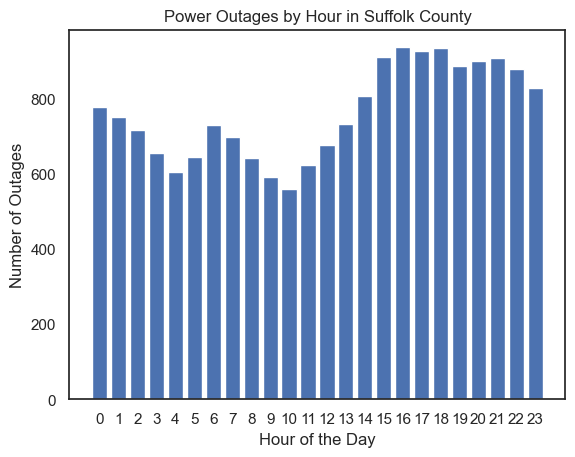

,fips_code,county,state,sum,run_start_time,Weekend,Season,hour,month,time_diff,outage_id
42812,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00,1,3,17,1,15.0,0
45687,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00,1,3,18,1,60.0,1
48440,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00,1,3,19,1,60.0,2
49107,25025,Suffolk,Massachusetts,1,2023-01-01 19:45:00,1,3,19,1,15.0,2
49773,25025,Suffolk,Massachusetts,1,2023-01-01 20:00:00,1,3,20,1,15.0,2


In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'run_start_time' to datetime (assuming it's in a suitable string format)
suffolk_df['run_start_time'] = pd.to_datetime(suffolk_df['run_start_time'])

# Extract the hour from the 'run_start_time'
suffolk_df['hour'] = suffolk_df['run_start_time'].dt.hour

# Count the number of outages per hour
outage_counts_by_hour = suffolk_df['hour'].value_counts().sort_index()

# Plot the histogram
plt.bar(outage_counts_by_hour.index, outage_counts_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Outages')
plt.title('Power Outages by Hour in Suffolk County')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

suffolk_df.head()

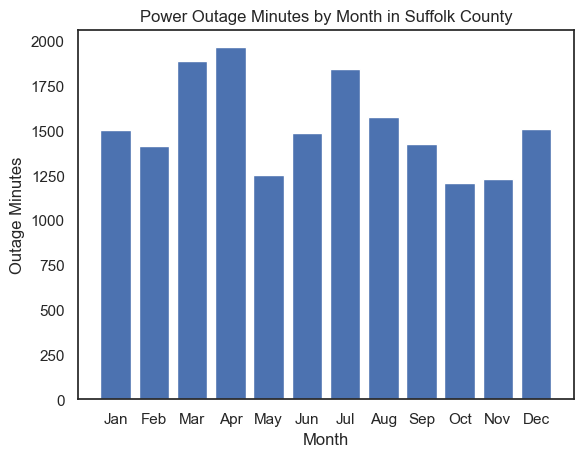

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_outages_by_month(county_df):
    try:
        

        # Extract the month from the `run_start_time` column
        county_df['month'] = county_df['run_start_time'].dt.month

        # Count the number of outages per month and sort by month number
        outage_counts_by_month = county_df['month'].value_counts().sort_index()

        # Plot the histogram
        plt.bar(outage_counts_by_month.index, outage_counts_by_month.values)
        plt.xlabel('Month')
        plt.ylabel('Outage Minutes')
        plt.title('Power Outage Minutes by Month in Suffolk County')
        plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.show()

    except FileNotFoundError:
        print(f"Error: File '{csv_file_path}' not found.")
    except KeyError as e:
        print(f"Error: Column '{e.args[0]}' not found in '{csv_file_path}'.")


# Usage
plot_outages_by_month(suffolk_df)

In [105]:
# Sort by 'run_start_time' to ensure chronological order
suffolk_df = suffolk_df.sort_values('run_start_time')

# Calculate the time difference between consecutive rows in minutes
suffolk_df['time_diff'] = suffolk_df['run_start_time'].diff().dt.total_seconds() / 60

# Fill the first difference (which will be NaN) with 15 (assuming the first row is the start of an outage)
suffolk_df['time_diff'].fillna(15, inplace=True)

# Create an 'outage_id' column to group consecutive 15-minute intervals into outages
suffolk_df['outage_id'] = (suffolk_df['time_diff'] > 15).cumsum()  # Increment outage_id whenever time_diff is greater than 15

suffolk_df.head(80)

#try

C:\Users\jonas\AppData\Local\Temp\ipykernel_18760\3970779610.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  suffolk_df['time_diff'].fillna(15, inplace=True)


,fips_code,county,state,sum,run_start_time,Weekend,Season,hour,month,time_diff,outage_id
42812,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00,1,3,17,1,15.0,0
45687,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00,1,3,18,1,60.0,1
48440,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00,1,3,19,1,60.0,2
49107,25025,Suffolk,Massachusetts,1,2023-01-01 19:45:00,1,3,19,1,15.0,2
49773,25025,Suffolk,Massachusetts,1,2023-01-01 20:00:00,1,3,20,1,15.0,2
...,...,...,...,...,...,...,...,...,...,...,...
192047,25025,Suffolk,Massachusetts,1,2023-01-03 22:45:00,0,3,22,1,15.0,11
192944,25025,Suffolk,Massachusetts,1,2023-01-03 23:00:00,0,3,23,1,15.0,11
197250,25025,Suffolk,Massachusetts,1,2023-01-04 00:15:00,0,3,0,1,75.0,12
198087,25025,Suffolk,Massachusetts,1,2023-01-04 00:30:00,0,3,0,1,15.0,12


In [106]:
# Create a boolean mask to identify the first row of each outage group
is_start_of_outage = suffolk_df['outage_id'] != suffolk_df['outage_id'].shift(1)

# Filter the DataFrame using the mask to get only the starting times
suffolk_starting_df = suffolk_df[is_start_of_outage].copy()  # Make a copy to avoid modifying the original DataFrame

suffolk_starting_df.head()

,fips_code,county,state,sum,run_start_time,Weekend,Season,hour,month,time_diff,outage_id
42812,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00,1,3,17,1,15.0,0
45687,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00,1,3,18,1,60.0,1
48440,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00,1,3,19,1,60.0,2
55045,25025,Suffolk,Massachusetts,1,2023-01-01 22:00:00,1,3,22,1,120.0,3
67885,25025,Suffolk,Massachusetts,1,2023-01-02 03:45:00,0,3,3,1,60.0,4


In [107]:
# Group by 'outage_id' and count the number of intervals to get the outage duration in intervals
outage_durations_df = suffolk_df.groupby('outage_id').size().reset_index(name='duration_intervals')

# Convert duration from intervals to minutes
outage_durations_df['duration_minutes'] = outage_durations_df['duration_intervals'] * 15

outage_durations_df.head()

,outage_id,duration_intervals,duration_minutes
0,0,1,15
1,1,1,15
2,2,3,45
3,3,20,300
4,4,8,120


In [108]:
# Create a boolean mask to identify the first row of each outage group
is_start_of_outage = suffolk_df['outage_id'] != suffolk_df['outage_id'].shift(1)

# Filter the DataFrame using the mask to get only the starting times
suffolk_starting_df = suffolk_df[is_start_of_outage].copy() 

# Group by 'outage_id' and count the number of intervals to get the outage duration in intervals
outage_durations_df = suffolk_df.groupby('outage_id').size().reset_index(name='duration_intervals')

# Convert duration from intervals to minutes
outage_durations_df['duration_minutes'] = outage_durations_df['duration_intervals'] * 15

# Merge the two DataFrames on 'outage_id'
suffolk_starting_df = pd.merge(suffolk_starting_df, outage_durations_df, on='outage_id', how='left')
suffolk_starting_df.drop(columns=['time_diff'], inplace=True)

suffolk_starting_df.tail() 

,fips_code,county,state,sum,run_start_time,Weekend,Season,hour,month,outage_id,duration_intervals,duration_minutes
1278,25025,Suffolk,Massachusetts,1,2023-12-29 02:30:00,0,3,2,12,1278,6,90
1279,25025,Suffolk,Massachusetts,1,2023-12-29 13:45:00,0,3,13,12,1279,9,135
1280,25025,Suffolk,Massachusetts,1,2023-12-30 20:15:00,1,3,20,12,1280,8,120
1281,25025,Suffolk,Massachusetts,18,2023-12-31 04:15:00,1,3,4,12,1281,21,315
1282,25025,Suffolk,Massachusetts,15,2023-12-31 12:00:00,1,3,12,12,1282,13,195


In [109]:
# Count outages longer than 480 minutes
longer_than_480 = suffolk_starting_df[suffolk_starting_df['duration_minutes'] >= 60].shape[0]

# Count outages shorter than or equal to 480 minutes
shorter_than_or_equal_to_480 = suffolk_starting_df[suffolk_starting_df['duration_minutes'] >= 480].shape[0]

print("Number of outages longer than 60 minutes:", longer_than_480)
print("Number of outages longer than 480 minutes:", shorter_than_or_equal_to_480)

Number of outages longer than 60 minutes: 847
Number of outages longer than 480 minutes: 139


In [110]:
# Find the row with the maximum 'duration_minutes'
max_duration_row = suffolk_starting_df.loc[suffolk_starting_df['duration_minutes'].idxmax()]

# Extract the outage_id of the row with the maximum duration
max_outage_id = max_duration_row['outage_id']
print(max_duration_row)

fips_code                           25025
county                            Suffolk
state                       Massachusetts
sum                                    66
run_start_time        2023-03-25 15:00:00
Weekend                                 1
Season                                  2
hour                                   15
month                                   3
outage_id                             281
duration_intervals                    594
duration_minutes                     8910
Name: 281, dtype: object


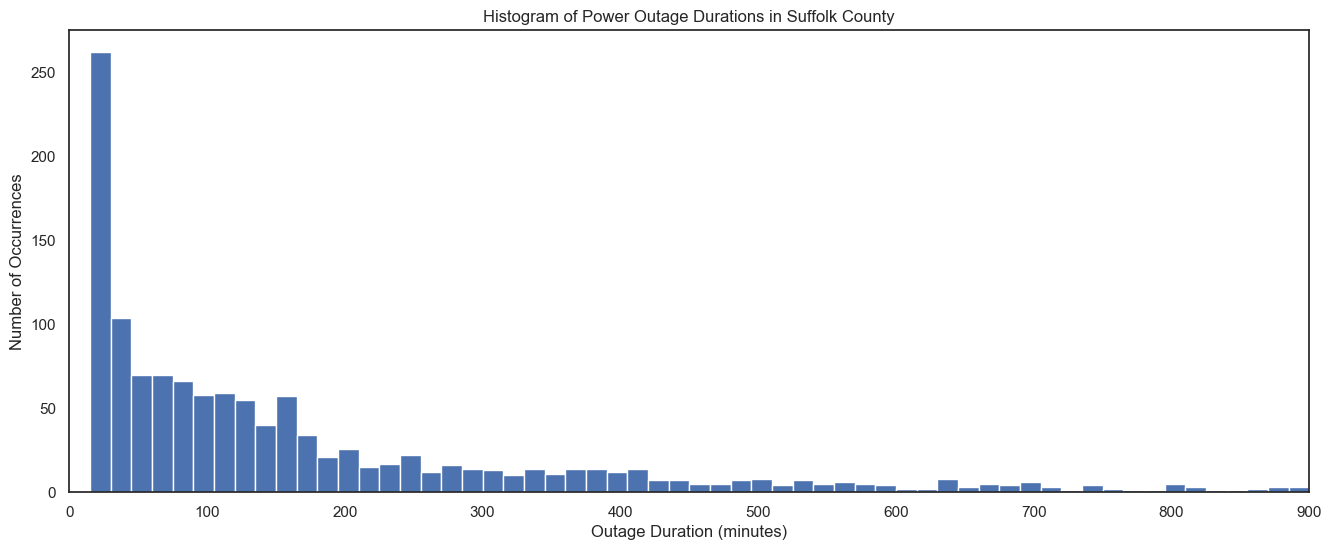

In [111]:
# Plot the histogram
plt.figure(figsize=(16, 6)) 
plt.xlim(0, 900)
plt.hist(suffolk_starting_df['duration_minutes'], bins = list(range(0, 15000, 15)))  # Adjust 'bins' as needed
plt.xlabel('Outage Duration (minutes)')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Power Outage Durations in Suffolk County')
plt.show()

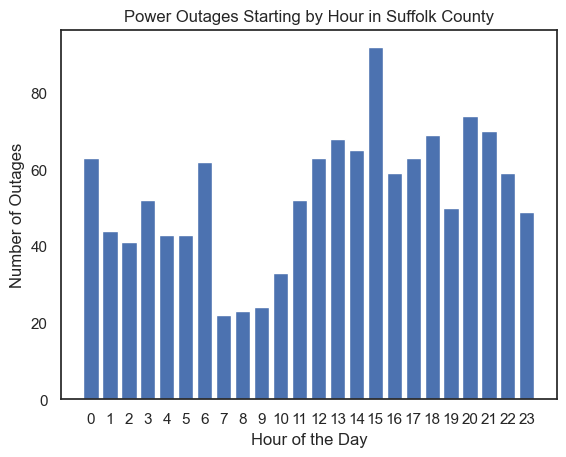

In [112]:
# Count the number of outages per hour
starting_outage_counts_by_hour = suffolk_starting_df['hour'].value_counts().sort_index()

# Plot the histogram
plt.bar(starting_outage_counts_by_hour.index, starting_outage_counts_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Outages')
plt.title('Power Outages Starting by Hour in Suffolk County')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.show()

#try3

In [113]:
# Count the occurrences of outages for Weekend = 0 and Weekend = 1
weekday_outages_count = suffolk_starting_df['Weekend'].value_counts().get(0, 0)  # Get count for Weekend=0, default to 0 if not present
weekend_outages_count = suffolk_starting_df['Weekend'].value_counts().get(1, 0)  # Get count for Weekend=1, default to 0 if not present

# Print the results
print("Number of outages on weekdays (Weekend = 0):", weekday_outages_count)
print("Number of outages on weekends (Weekend = 1):", weekend_outages_count)

Number of outages on weekdays (Weekend = 0): 920
Number of outages on weekends (Weekend = 1): 363


This represents a percentage of 71 % of outages on weekdays which is almost exavtly the 71.4% of weekdays within a week (5/7).
Thus there is no pattern concerning weekend or weekdays. 

In [114]:
# Display the updated DataFrame
suffolk_starting_df.head(5000)

,fips_code,county,state,sum,run_start_time,Weekend,Season,hour,month,outage_id,duration_intervals,duration_minutes
0,25025,Suffolk,Massachusetts,1,2023-01-01 17:30:00,1,3,17,1,0,1,15
1,25025,Suffolk,Massachusetts,59,2023-01-01 18:30:00,1,3,18,1,1,1,15
2,25025,Suffolk,Massachusetts,1,2023-01-01 19:30:00,1,3,19,1,2,3,45
3,25025,Suffolk,Massachusetts,1,2023-01-01 22:00:00,1,3,22,1,3,20,300
4,25025,Suffolk,Massachusetts,1,2023-01-02 03:45:00,0,3,3,1,4,8,120
...,...,...,...,...,...,...,...,...,...,...,...,...
1278,25025,Suffolk,Massachusetts,1,2023-12-29 02:30:00,0,3,2,12,1278,6,90
1279,25025,Suffolk,Massachusetts,1,2023-12-29 13:45:00,0,3,13,12,1279,9,135
1280,25025,Suffolk,Massachusetts,1,2023-12-30 20:15:00,1,3,20,12,1280,8,120
1281,25025,Suffolk,Massachusetts,18,2023-12-31 04:15:00,1,3,4,12,1281,21,315


In [115]:
import pandas as pd

# Select the relevant columns for the correlation analysis
columns_to_analyze = ['hour', 'month', 'duration_minutes', 'Weekend', 'Season']
subset_df = suffolk_starting_df[columns_to_analyze]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

                      hour     month  duration_minutes   Weekend    Season
hour              1.000000 -0.016138         -0.003881 -0.012838  0.084388
month            -0.016138  1.000000         -0.066051  0.043155 -0.186144
duration_minutes -0.003881 -0.066051          1.000000 -0.044976  0.024655
Weekend          -0.012838  0.043155         -0.044976  1.000000  0.054873
Season            0.084388 -0.186144          0.024655  0.054873  1.000000


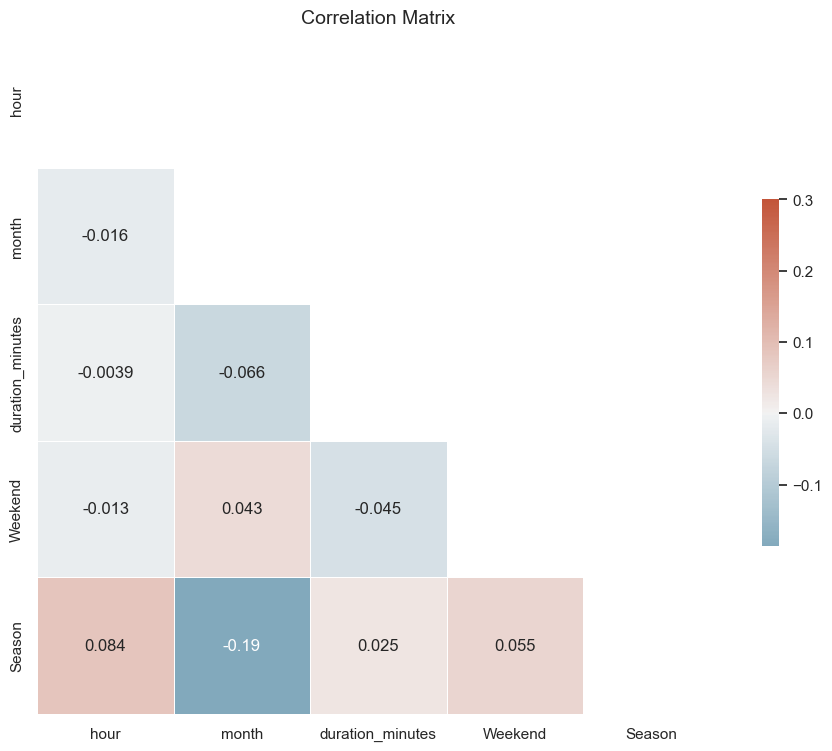

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the aesthetic style of the plots
sns.set_theme(style="white")

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Generate a mask for the upper triangle (to avoid redundant information)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix', fontsize=14)
plt.show()

Only very weak correlations are observed!